In [1]:
import scanpy as sc
import pandas as pd
import CococoNet_reader
import numpy as np
import itertools
import anndata as ad
from scipy import sparse

In [2]:
concatenated_human_chimp_data = sc.read_h5ad('/data/passala/Generated_Tables/chimp_human_data/chimp_human_concatenated_and_slimmed.h5ad')

In [3]:
concatenated_human_chimp_data

AnnData object with n_obs × n_vars = 270166 × 10129
    obs: 'final_subclass', 'final_cluster', 'final_subclass_color', 'final_cluster_color', 'Species', 'tech', 'leiden'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [4]:
sc.set_figure_params(facecolor = 'white', figsize = (20,16))

[[0.         0.25980401]
 [0.         0.        ]]
Processing datasets Human <=> Chimp


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


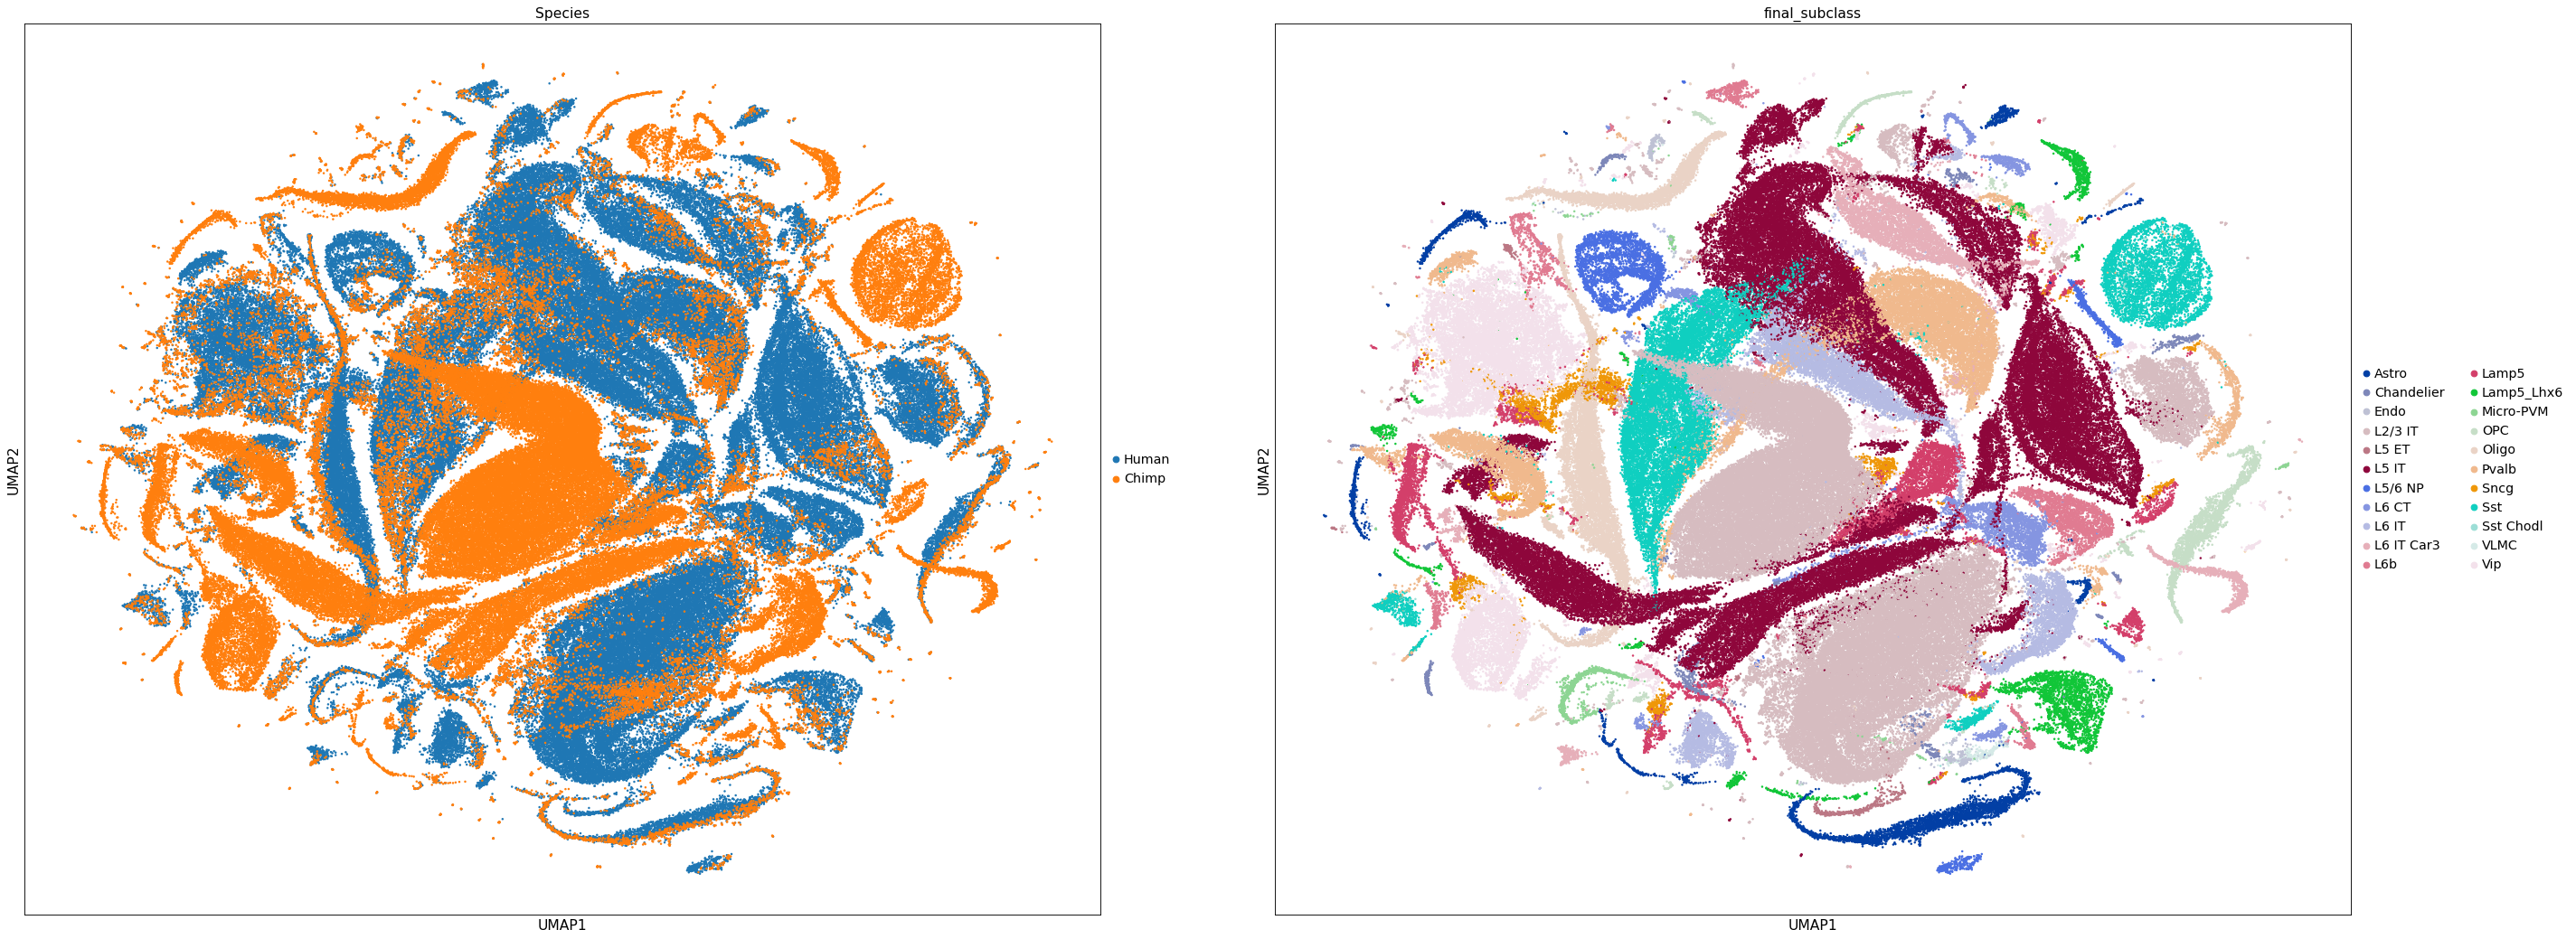

In [5]:
import scanorama
sc.tl.pca(concatenated_human_chimp_data, svd_solver='arpack',)

sc.external.pp.scanorama_integrate(concatenated_human_chimp_data,'Species', batch_size= 500)
sc.pp.neighbors(concatenated_human_chimp_data, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama',)
sc.tl.umap(concatenated_human_chimp_data, )
sc.pl.umap(concatenated_human_chimp_data, color= ['Species', 'final_subclass'], s = 20,)

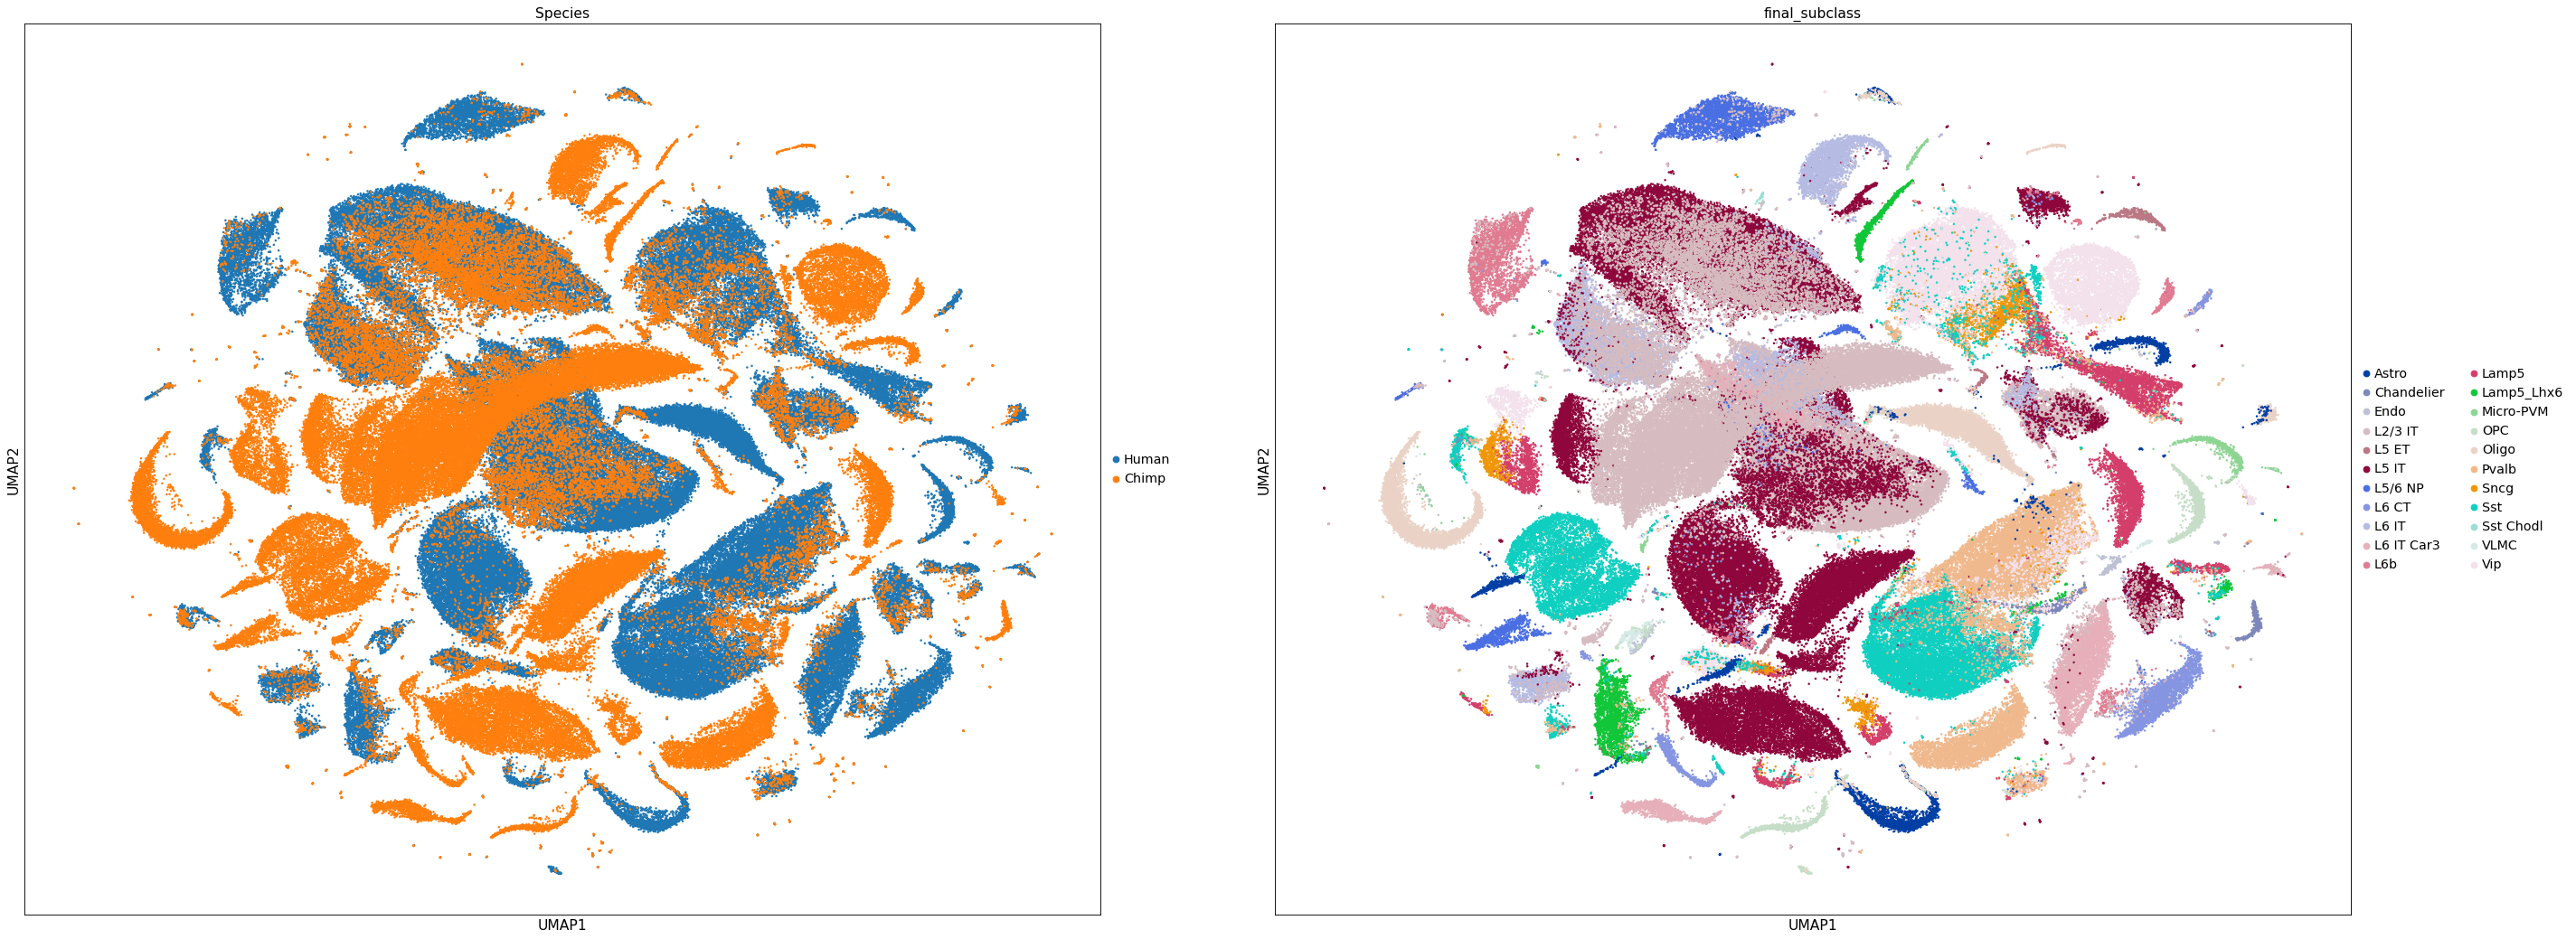

In [7]:
sc.pl.umap(concatenated_human_chimp_data, color= ['Species', 'final_subclass'], s = 20,)

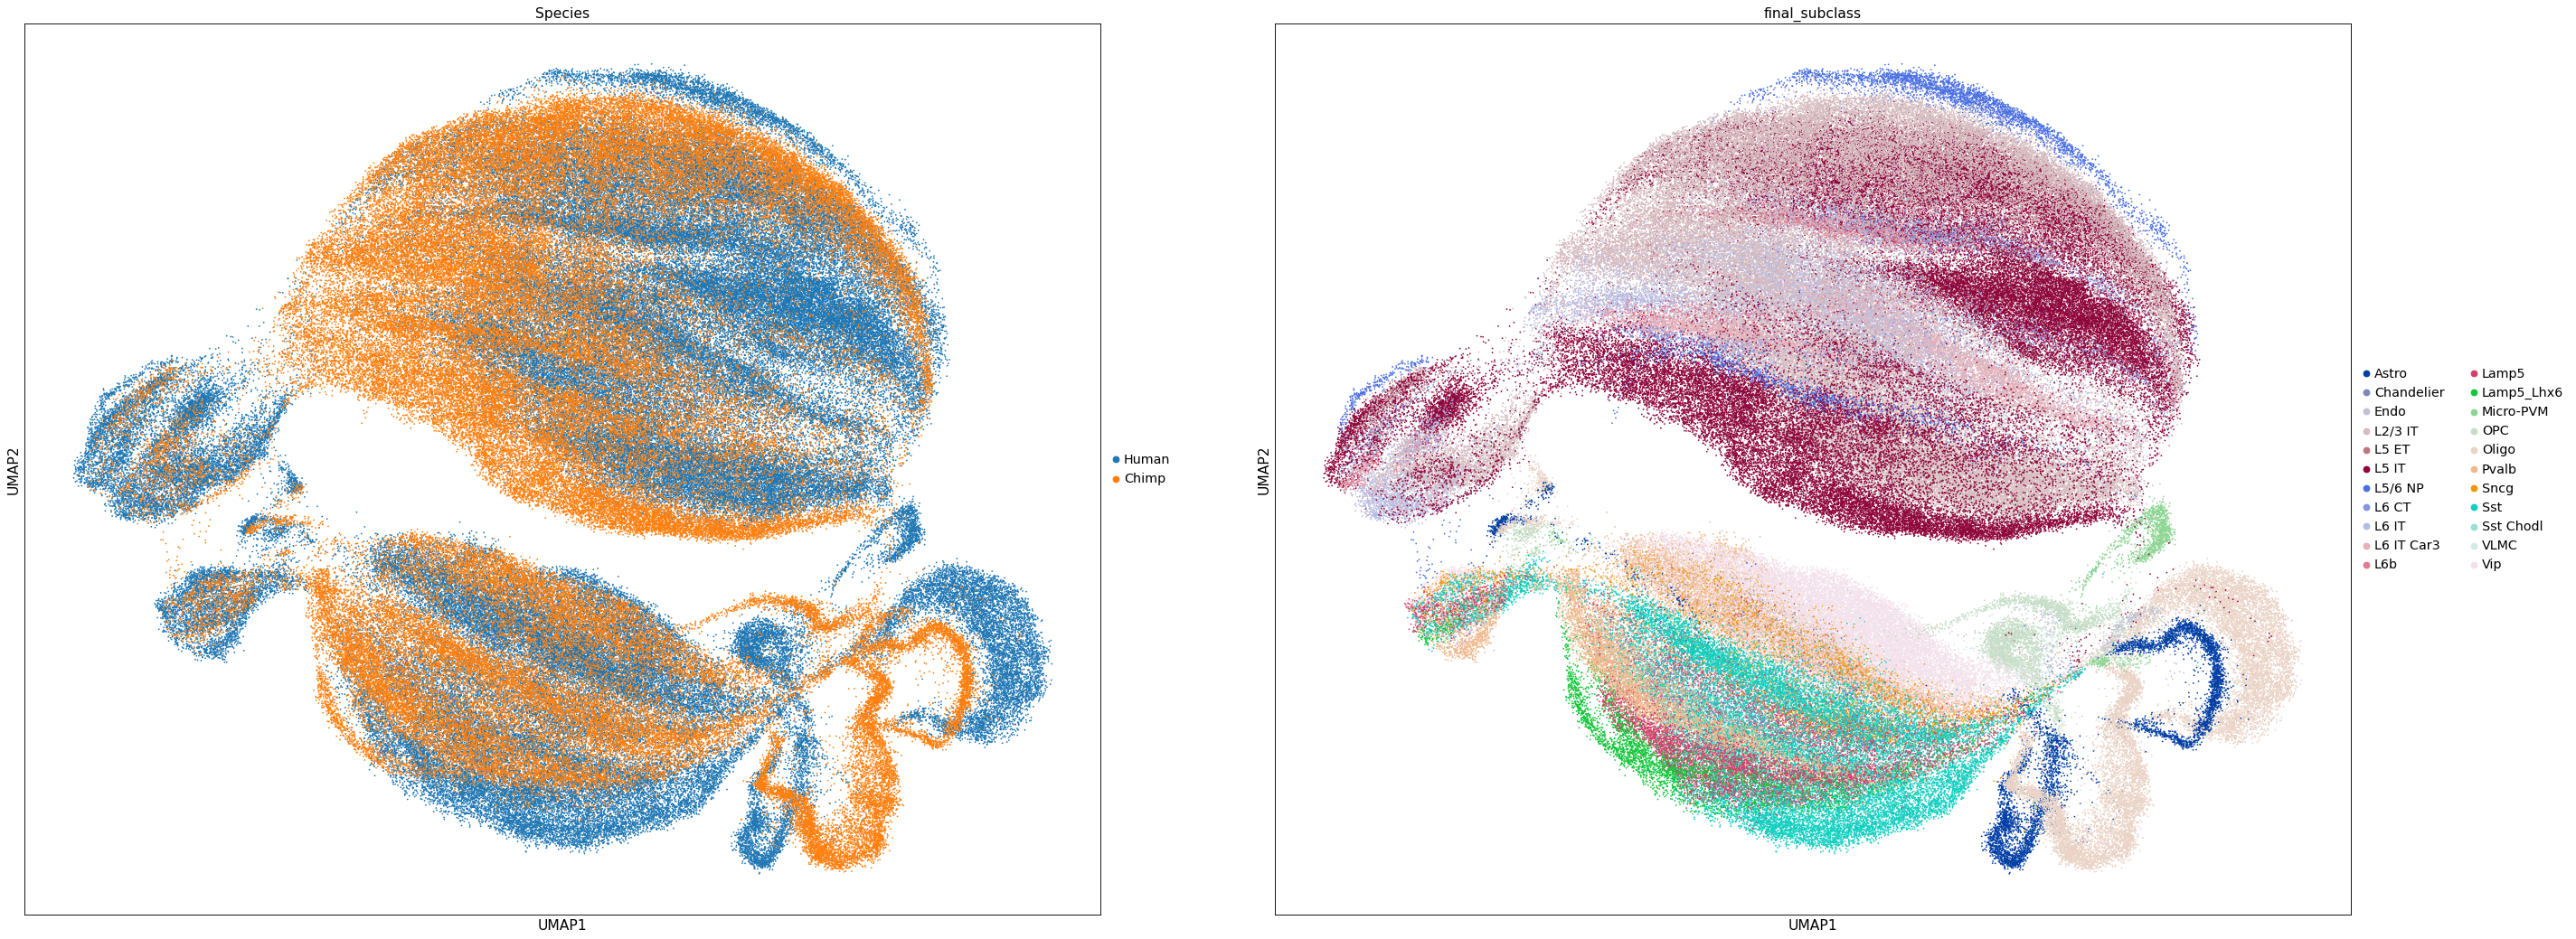

In [10]:
# BBKNN - Ok Integration, still a big blob
import bbknn
bbknn.bbknn(adata = concatenated_human_chimp_data, batch_key= 'Species')
sc.tl.umap(concatenated_human_chimp_data, random_state= 202)
sc.pl.umap(concatenated_human_chimp_data, color= ['Species', 'final_subclass'], s = 10,)

In [ ]:
sc.pl.umap(concatenated_human_chimp_data, color= ['Species', 'final_subclass'], s = 10,)